In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [85]:
original = cv2.imread('rabbit2.png', 0)

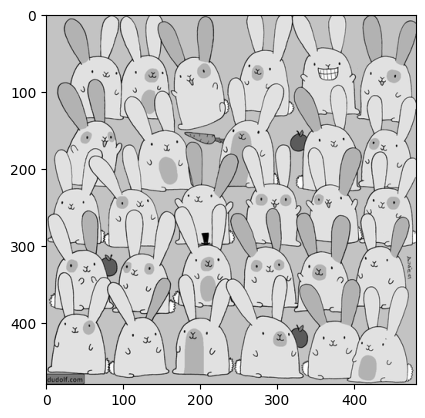

In [86]:
plt.imshow(original, cmap='gray')

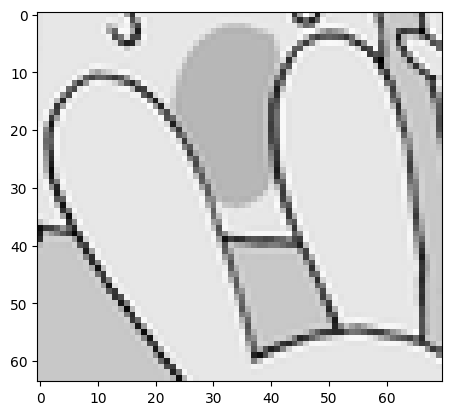

In [87]:
rabbit2 = original[96:160, 100:170]
plt.imshow(rabbit2, cmap='gray')

array([[221, 225, 225, ..., 100, 221, 224],
       [222, 225, 225, ..., 104, 218, 225],
       [222, 225, 225, ...,  81, 213, 225],
       ...,
       [195, 195, 195, ..., 224, 224, 229],
       [195, 195, 195, ..., 225, 225, 224],
       [195, 195, 195, ..., 225, 225, 225]], dtype=uint8)
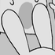

In [88]:
template= cv2.resize(rabbit2, (55, 55))
template

In [89]:
def edge_detection(image):
    blur = cv2.GaussianBlur(image, (5,5), 0)
    edges = cv2.Canny(blur, 0, 50)
    return edges

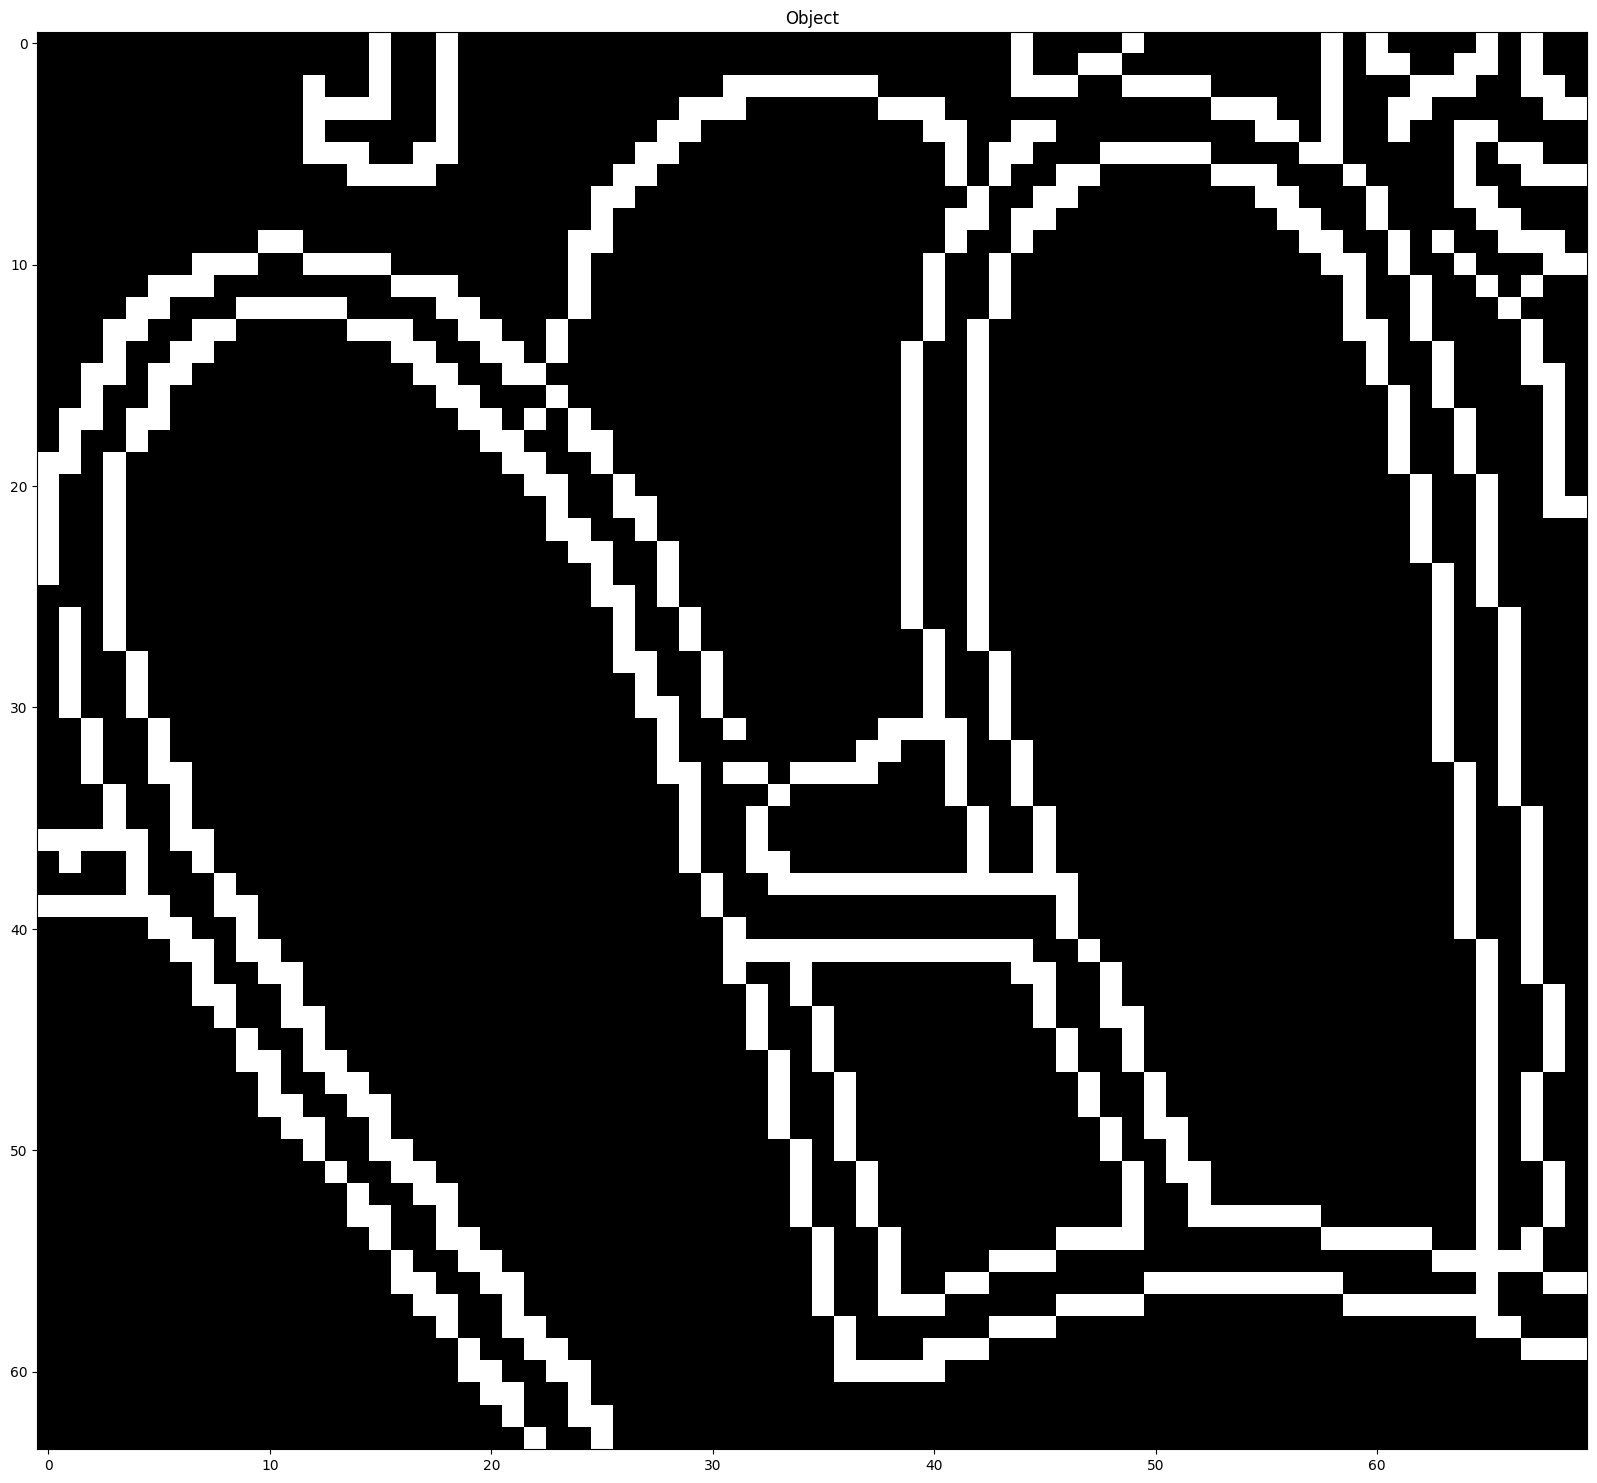

In [90]:

edge = edge_detection(rabbit2)
plt.figure(figsize=(20, 20))
plt.imshow(edge, cmap='gray')
plt.title('Object')
plt.show()


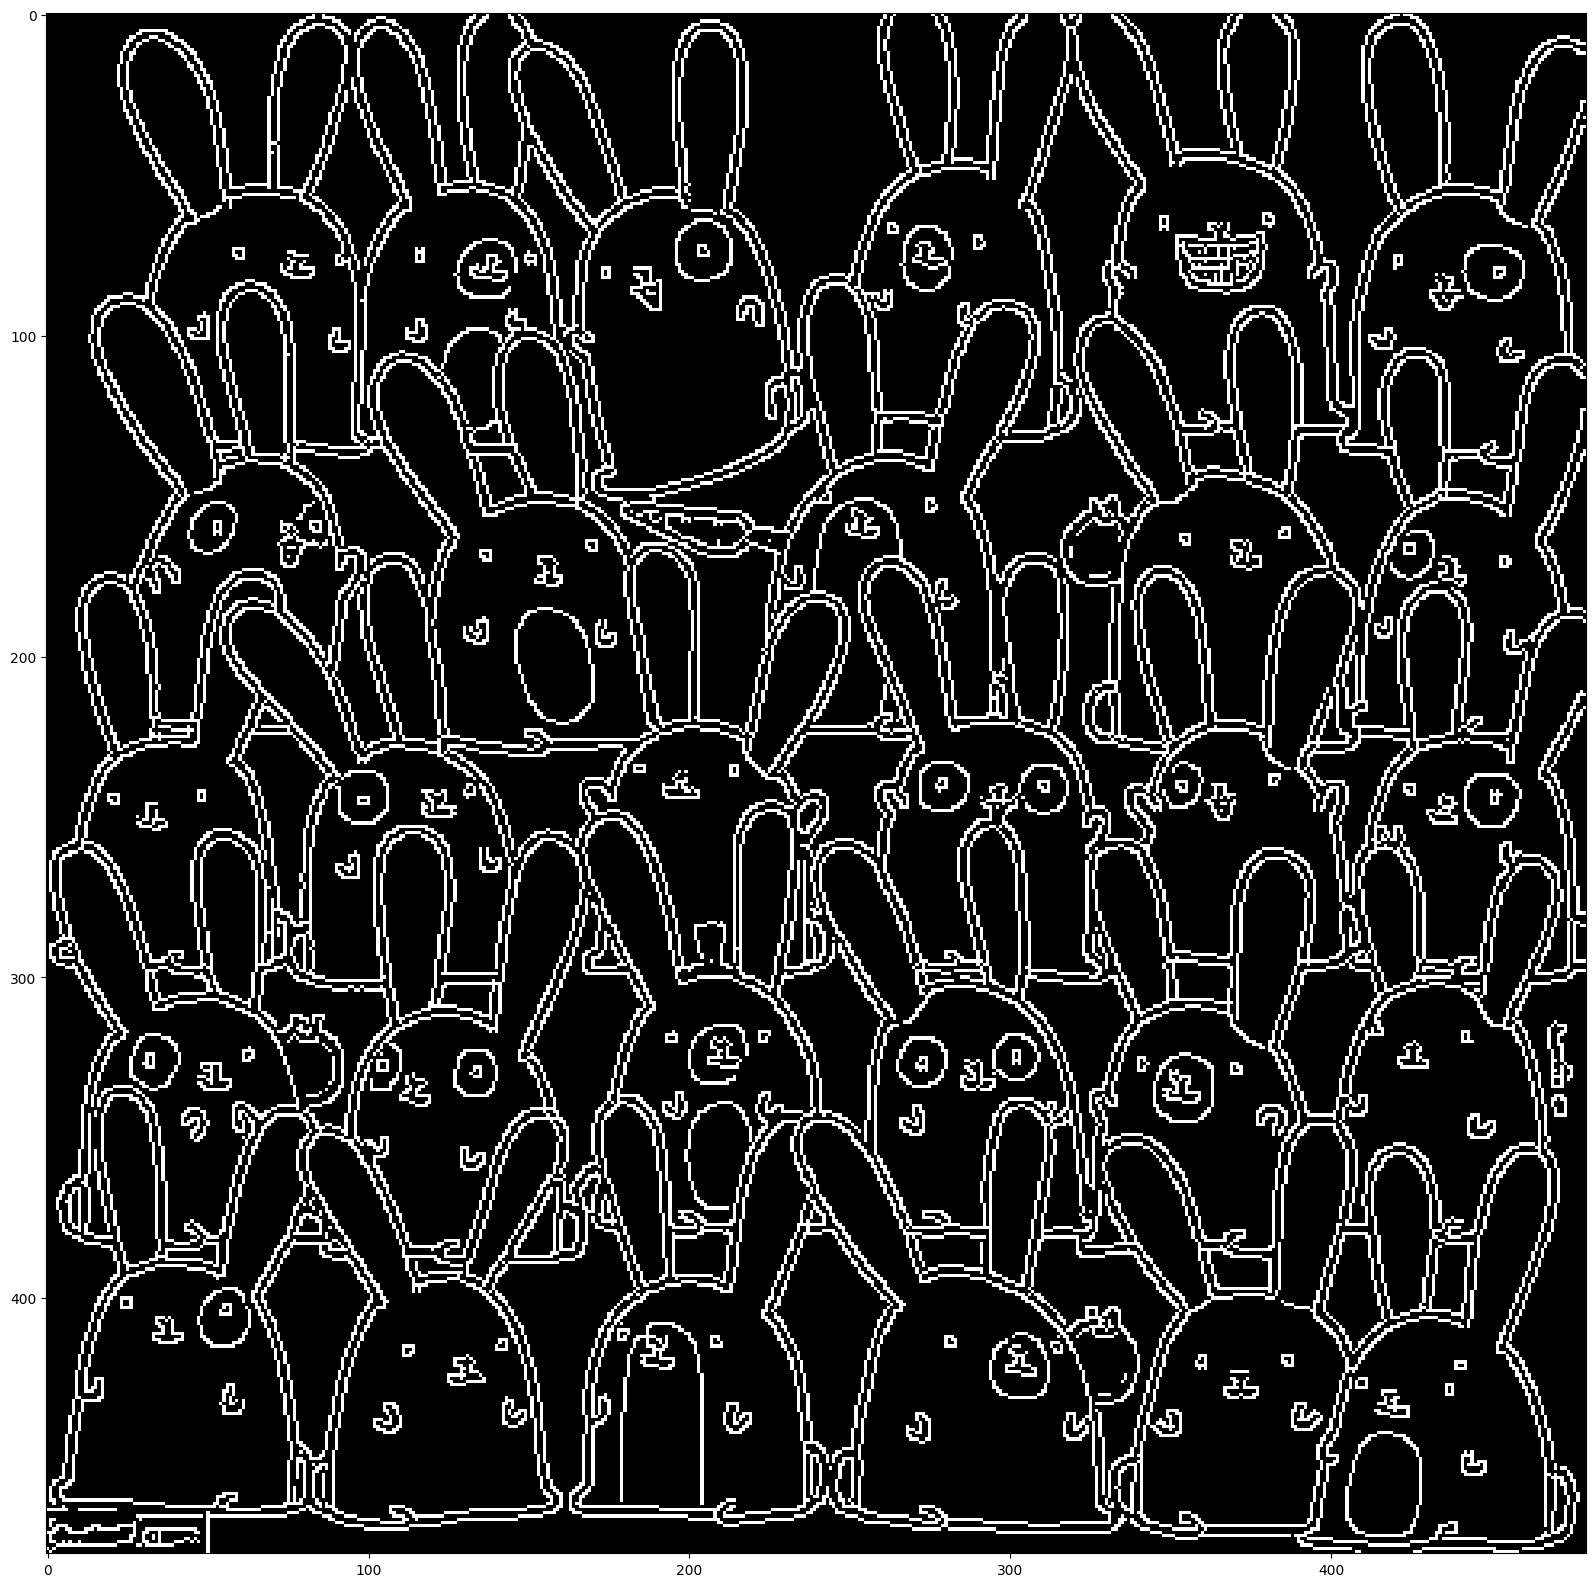

In [91]:
target_edges = edge_detection(original)
plt.figure(figsize=(20, 20))
plt.imshow(target_edges, cmap='gray', )

In [92]:
import cv2
import numpy as np

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

def flip_image(image, flip_code):
    return cv2.flip(image, flip_code)


rotation_angles = [-45, 45, 90]
flip_codes = [0, 1]

threshold = 0.18
scale_factors = np.linspace(0.8, 1.4, 100).tolist()
detections = []

for scale in scale_factors:

    scaled_template = cv2.resize(edge, None, fx=scale, fy=scale)

    res = cv2.matchTemplate(target_edges, scaled_template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)
    for pt in zip(*loc[::-1]):
        detections.append((pt[0], pt[1], scaled_template.shape[1], scaled_template.shape[0]))

    for angle in rotation_angles:
        rotated_template = rotate_image(scaled_template, angle)
        res = cv2.matchTemplate(target_edges, rotated_template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= threshold)
        for pt in zip(*loc[::-1]):
            detections.append((pt[0], pt[1], rotated_template.shape[1], rotated_template.shape[0]))

    for flip_code in flip_codes:
        flipped_template = flip_image(scaled_template, flip_code)
        res = cv2.matchTemplate(target_edges, flipped_template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= threshold)
        for pt in zip(*loc[::-1]):
            detections.append((pt[0], pt[1], flipped_template.shape[1], flipped_template.shape[0]))

final_detections = non_max_suppression(detections, overlapThresh=0.1)

for (x1, y1, x2, y2) in final_detections:
    cv2.rectangle(target_edges, (x1, y1), (x2, y2), (255, 0, 0), 2)

print(f"Number of matches: {len(final_detections)}")

# Lưu ảnh với các kết quả phát hiện
cv2.imwrite('detected_matches.jpg', target_edges)


Number of matches: 26


True

In [93]:
import cv2
import numpy as np

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

def flip_image(image, flip_code):
    return cv2.flip(image, flip_code)

def non_max_suppression(detections, overlapThresh):
    if len(detections) == 0:
        return []

    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in detections])

    pick = []

    x1 = rects[:, 0]
    y1 = rects[:, 1]
    x2 = rects[:, 2]
    y2 = rects[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:-1]])
        yy1 = np.maximum(y1[i], y1[idxs[:-1]])
        xx2 = np.minimum(x2[i], x2[idxs[:-1]])
        yy2 = np.minimum(y2[i], y2[idxs[:-1]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / area[idxs[:-1]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

    return rects[pick].astype(int)

rotation_angles = [-45, 45, 90]
flip_codes = [0, 1]

threshold = 0.18
scale_factors = np.linspace(0.8, 1.4, 100).tolist()
detections = []

for scale in scale_factors:

    scaled_template = cv2.resize(edge, None, fx=scale, fy=scale)

    res = cv2.matchTemplate(target_edges, scaled_template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)
    for pt in zip(*loc[::-1]):
        detections.append((pt[0], pt[1], scaled_template.shape[1], scaled_template.shape[0]))

    for angle in rotation_angles:
        rotated_template = rotate_image(scaled_template, angle)
        res = cv2.matchTemplate(target_edges, rotated_template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= threshold)
        for pt in zip(*loc[::-1]):
            detections.append((pt[0], pt[1], rotated_template.shape[1], rotated_template.shape[0]))

    for flip_code in flip_codes:
        flipped_template = flip_image(scaled_template, flip_code)
        res = cv2.matchTemplate(target_edges, flipped_template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= threshold)
        for pt in zip(*loc[::-1]):
            detections.append((pt[0], pt[1], flipped_template.shape[1], flipped_template.shape[0]))

final_detections = non_max_suppression(detections, overlapThresh=0.1)

for (x1, y1, x2, y2) in final_detections:
    cv2.rectangle(target_edges, (x1, y1), (x2, y2), (255, 0, 0), 2)

print(f"Number of matches: {len(final_detections)}")

cv2.imwrite('detected_matches.jpg', target_edges)


Number of matches: 25


True

In [94]:
for (x1, y1, x2, y2) in final_detections:
    cv2.rectangle(original, (x1, y1), (x2, y2), (0, 0, 0), 2)

array([[195, 195, 195, ..., 195, 195, 195],
       [195, 195, 195, ..., 195, 195, 195],
       [195, 195, 195, ..., 195, 195, 195],
       ...,
       [ 74, 123, 125, ..., 195, 195, 195],
       [ 71, 126, 125, ..., 195, 195, 195],
       [ 59,  75, 109, ..., 195, 195, 195]], dtype=uint8)
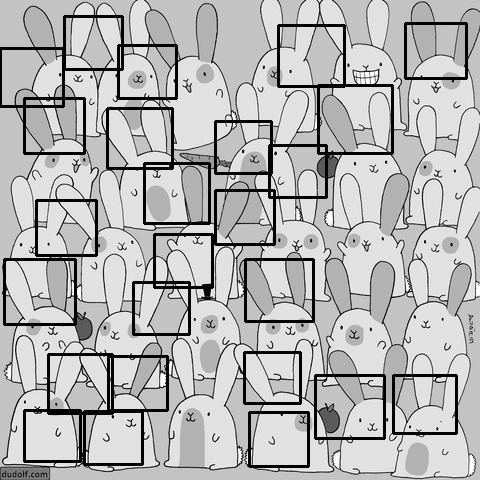

In [95]:
cv2.rectangle(original, (x1, y1), (x2, y2), (0, 0, 0), 2)